<a href="https://colab.research.google.com/github/KengoTobita/python_startup/blob/master/beer_stp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonデータ分析入門 <br>ビールの新商品を開発してみよう。

## 今日の流れ
- Pythonって何？
- Pythonに慣れよう ~irisデータをいじろう~
- データ分析とは？ ~STP戦略編~
    - Jupyter Notebook　を使いこなそう
    - Pandasを使用してデータを扱おう
    - Scikit-Leanって何？
- 今日の振り返り

# Pythonってなに？
近頃人気の汎用プログラミング言語です。<br>
簡便な文法と、豊富なライブラリを背景に広く浸透しました。<br>
***
Print関数は引数を出力する関数です。

In [0]:
print("hello world")

hello world


簡単な四則演算が可能です。<br>

In [0]:
(1+2)*100

300

変数を使用することで、コードがわかりやすくなります。

In [0]:
a = 100
b = 300

10*a + 1*b

1300

各要素を` , `で区切り`[ ]`で囲むことで、リスト型として扱うことが可能です。<br>
Pythonのインデックスは<font color = "red">0から始まる</font>ようになってます。<Br>
他言語に慣れてるかたは気をつけてください。


In [0]:
a= [0,1,2,3,4,5,6]
a[3:5]

[3, 4]

ライブラリを使用することで、難しいとこもサラッとできます。<br>
`import` を使用することで使用が可能です。<br>
<br>
この場合はnumpyという数学ライブラリを使用してドット積をしています。<br>
フゥ！かっこいい！

In [0]:
import numpy as np

a = np.array([1,2,3,4,5])
b = a.T

np.dot(a,b)

55

Jupyterのセル内の行の先頭に` ! `を記入することで、<br>
基本的なlinuxコマンドを使用することが可能です。

In [0]:
! pwd

/Users/kengotobita/Documents/beer_python


Pythonにはいくつか制御構文があります。<br>
今回はfor文だけ使用するので、それだけ紹介します。

In [0]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [0]:
for i in ["古池や", "蛙飛び込む","水の音"]:
    print(i)

古池や
蛙飛び込む
水の音


## 今回使用するライブラリ
### Pandas
CSV や Excelファイル、numpy.arrayなどのデータを<br>
とても扱いやすいデータ形式であるDataFrameに変換してくれる。<br>
変換後も値の変更や追加、削除、インデキシングなど便利な機能満載。<br>
<font size = 1>参考:[Pythonデータ分析/機械学習のための基本コーディング! pandasライブラリ活用入門 (impress top gear)](https://www.amazon.co.jp/Python%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0-pandas%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E6%B4%BB%E7%94%A8%E5%85%A5%E9%96%80-impress-gear/dp/4295005657/ref=asc_df_4295005657/?tag=jpgo-22&linkCode=df0&hvadid=295723231663&hvpos=1o1&hvnetw=g&hvrand=5237320592877007056&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009279&hvtargid=pla-601555356405&psc=1&th=1&psc=1)</font>
### Scikit-learn
Pythonで書かれた機械学習ライブラリ。<br>
非常に簡単な手順で分析ができる。<br>
教師あり学習から、教師なし学習、前処理まで色々できる。<br>
<font size = 1>参考: [Python機械学習プログラミング 第２版 ~達人データサイエンティストによる理論と実装~](https://amzn.to/2Na4DVf)</font>
### matplotlib
Pythonの描画ライブラリ。<br>
今回は散布図を作成するために使用。<br>
基本的なグラフはこれでかける。すごい。
***

# irisデータの分類問題をしてみよう<br>Scikit-learn入門

#### 1. データを用意する
irisデータはscikit-learnで準備することが可能です。<br>
今回はそのSciki-learnの機能を使用して準備し、<br>
Pandasというデータフレームライブラリを使用して扱いやすくます。<br>

##### データフレームとは？
2次元で表現された値を格納する表……のような概念。<br>
値の取り出しなどが非常に簡単。

In [0]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### pandas特定の値を持ってくる方法
* <b>df.loc\[ 行 , 列\]</b><br>
データフレームのindexとcolonmの<font color = "red">**名前**</font>を元に引っ張ってくる。<br>
例えば上記のデータフレームならば、`df.loc[:, "sepal length (cm)"]`と指定すると,<br>
"sepal length (cm)"の行だけ持ってくる。<br>
<br>
* <b>df.iloc\[ 行, 列\]</b>
データフレームのindexとcolonmの<font color = "red">**順番**</font>を元に引っ張ってくる。<br>
例えば上記のデータフレームならば、`df.iloc[:, 0]`と指定すると,<br>
"sepal length (cm)"の行だけ持ってくる。<br>

In [0]:
df.loc[:,"sepal length (cm)"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [0]:
df.iloc[:,0].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [0]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

純粋にPythonだけで自力実装をすると、こうなります。

In [0]:

class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):

        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):

        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [0]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)


print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 9


/Users/kengotobita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


# 実践編 ~ビールデータを使用して新商品を開発しよう~

In [0]:
import pandas as pd

df = pd.read_csv("beer.csv", encoding="shiftjis")
df.head()

,name,asahi,sapporo,kirin,suntry,price,alcohol,calorie,suger,prin,beer_type,spark_type,new_type
0,アサヒスーパードライ,1,0,0,0,194,0.050,42,3.0,5.5,1,0,0
1,アサヒスーパードライ 瞬冷辛口,1,0,0,0,196,0.050,41,2.5,6.4,1,0,0
2,アサヒ グランマイルド,1,0,0,0,200,0.070,47,1.7,6.9,1,0,0
3,アサヒドライプレミアム豊醸,1,0,0,0,210,0.065,49,3.1,8.1,1,0,0
4,アサヒスーパードライ ドライブラック,1,0,0,0,213,0.055,45,3.1,5.2,1,0,0


In [0]:
pca_data = df.iloc[:,1:10]
pca_data

,asahi,sapporo,kirin,suntry,price,alcohol,calorie,suger,prin
0,1,0,0,0,194,0.050,42,3.0,5.5
1,1,0,0,0,196,0.050,41,2.5,6.4
2,1,0,0,0,200,0.070,47,1.7,6.9
3,1,0,0,0,210,0.065,49,3.1,8.1
4,1,0,0,0,213,0.055,45,3.1,5.2
5,1,0,0,0,205,0.045,41,3.0,6.2
6,1,0,0,0,233,0.050,34,1.0,6.4
7,1,0,0,0,267,0.055,45,3.2,6.8
8,1,0,0,0,233,0.060,44,2.3,6.8
9,1,0,0,0,224,0.080,74,6.5,3.5


NaNの消去

In [0]:
pca_data = pca_data.dropna(how='any')

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
total_pca = pca.fit_transform(pca_data)
type(total_pca)

numpy.ndarray

In [0]:
pca.n_components_

2

縦軸は価格では？<br>
横軸はカロリー,糖質,プリン体などが関係している……味わいでは？

In [0]:
print(pca.components_[0])
print(pca_data.columns[np.argmax(pca.components_[0])])
print("=" * 100)
print(pca.components_[1])
print(pca_data.columns[np.argmax(pca.components_[1])])

[-1.28071790e-04  3.96367736e-04  6.11443812e-04 -8.79739759e-04
  9.98373383e-01  6.70184802e-06  4.20240967e-02  1.13671690e-02
  3.57577711e-02  8.68400121e-03]
price
[-3.33148328e-03  6.44350689e-03 -8.77931536e-03  5.66729176e-03
 -4.78001941e-02  9.32616276e-04  9.81752849e-01  1.13710167e-01
  1.44134706e-01  2.99783812e-03]
calorie


In [0]:
pca_pandas = pd.DataFrame(total_pca,columns=["第一主成分", "第二主成分"])
pca_pandas.head()

,第一主成分,第二主成分
0,24.321885,-1.898612
1,26.303106,-2.903099
2,30.557530,2.777335
3,40.684135,4.594990
4,43.407461,0.106578


In [0]:
total_pca[:,0]

array([ 24.32188537,  26.30310645,  30.55752984,  40.68413519,
        43.40746135,  35.28699889,  62.93170218,  97.37797317,
        63.38102364,  55.5861277 , -40.45904909, -38.15291031,
       -38.53367199, -29.02606659, -19.30082055, -58.46277722,
       -55.2122679 , -55.84557095, -55.23314585, -55.62954715,
       -59.30564685,  19.31687353,  80.3147847 ,  18.59997058,
        54.27782081,  26.73562134,  42.48979844,  42.63009407,
        70.61689644,  33.64872656,  42.57270995,  58.58870817,
       -35.32536218, -43.5608581 , -53.72583731, -58.18081724,
       -55.14732854, -52.57103849, -58.59788993, -54.30940311,
        25.36470696,  29.60674053,  26.73818962,  29.35967456,
        36.32511408,  26.67887547,  97.61643953,  98.62709408,
       108.12339547, 104.45533259, -38.51602468, -38.31297887,
       -38.27824312, -57.87705622, -60.14649138, -58.41380726,
       -57.45840395, -57.28029977, -55.71197063,  42.65409993,
        37.57422073,  54.85021896,  29.47643551, -57.58

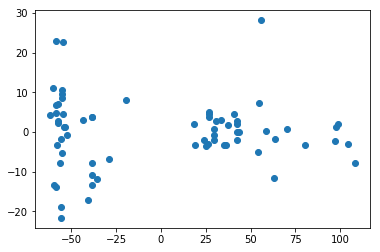

In [0]:
import matplotlib.pyplot as plt

plt.scatter(pca_pandas.iloc[:,0], pca_pandas.iloc[:,1])

In [0]:
from sklearn.cluster import KMeans

pred = KMeans(n_clusters=2).fit_predict(pca_pandas)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [0]:
pca_pandas["K-means"] = pred
pca_pandas.head()

,第一主成分,第二主成分,K-means
0,24.318525,-1.899439,1
1,26.299821,-2.903884,1
2,30.554401,2.776694,1
3,40.681387,4.594623,1
4,43.404820,0.106280,1


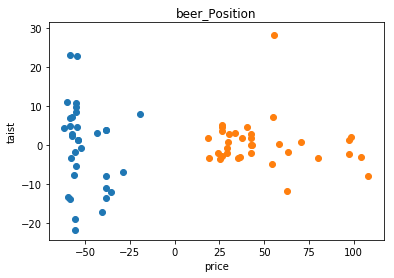

In [0]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for i in set(pca_pandas.iloc[:,2]):
    df_kmean = pca_pandas[pca_pandas['K-means'] == i]
    ax.scatter(data=df_kmean, x="第一主成分", y = "第二主成分",label='K-means')
    
ax.set_title("beer_Position")
ax.set_xlabel("price")
ax.set_ylabel("taist")

fig.show()

In [0]:
pca_data["K-means"] = pred
pca_data.head()

/Users/kengotobita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,asahi,sapporo,kirin,suntry,price,alcohol,calorie,suger,prin,K-means
0,1,0,0,0,194,0.050,42,3.0,5.5,1
1,1,0,0,0,196,0.050,41,2.5,6.4,1
2,1,0,0,0,200,0.070,47,1.7,6.9,1
3,1,0,0,0,210,0.065,49,3.1,8.1,1
4,1,0,0,0,213,0.055,45,3.1,5.2,1


In [0]:
kmean0 = pca_data[pca_data["K-means"] == 0]
kmean0.iloc[:,5:9].describe()

,alcohol,calorie,suger,prin
count,34.000000,34.000000,34.000000,34.000000
mean,0.053529,40.176471,1.932353,3.975000
std,0.012218,10.489448,1.525087,3.122262
min,0.030000,19.000000,0.000000,0.000000
25%,0.050000,33.250000,0.000000,1.750000
50%,0.050000,42.000000,2.350000,3.350000
75%,0.060000,45.750000,3.200000,5.850000
max,0.090000,63.000000,4.200000,11.000000


In [0]:
kmean1 = pca_data[pca_data["K-means"] == 1]
kmean1.iloc[:,5:9].describe()

,alcohol,calorie,suger,prin
count,35.000000,35.000000,35.000000,35.000000
mean,0.054571,45.142857,3.205714,8.294286
std,0.007005,6.141196,0.850240,2.012014
min,0.045000,34.000000,1.000000,3.500000
25%,0.050000,42.000000,2.900000,6.750000
50%,0.055000,45.000000,3.100000,8.500000
75%,0.055000,47.000000,3.500000,9.850000
max,0.080000,74.000000,6.500000,11.400000


***
# ビール内ではどのような分類になっているか？

In [0]:
kmean1.head()

,name,asahi,sapporo,kirin,suntry,price,alcohol,calorie,suger,prin,beer_type,spark_type,new_type,K-means
0,アサヒスーパードライ,1,0,0,0,194,0.050,42,3.0,5.5,1,0,0,1
1,アサヒスーパードライ 瞬冷辛口,1,0,0,0,196,0.050,41,2.5,6.4,1,0,0,1
2,アサヒ グランマイルド,1,0,0,0,200,0.070,47,1.7,6.9,1,0,0,1
3,アサヒドライプレミアム豊醸,1,0,0,0,210,0.065,49,3.1,8.1,1,0,0,1
4,アサヒスーパードライ ドライブラック,1,0,0,0,213,0.055,45,3.1,5.2,1,0,0,1


In [0]:
beer_pca = PCA(n_components=2)
beer_pca_fit = beer_pca.fit_transform(kmean1)
type(beer_pca_fit)

numpy.ndarray

In [0]:
beer_pca_pandas = pd.DataFrame(beer_pca_fit,columns=["第一主成分", "第二主成分"])
beer_pca_pandas.head()

,第一主成分,第二主成分
0,-24.577187,-2.663920
1,-22.594019,-3.783367
2,-18.520460,2.003459
3,-8.492478,3.950143
4,-5.539233,0.084667


In [0]:
print(beer_pca.components_[0])
print(pca_data.columns[np.argmax(beer_pca.components_[0])])
print("=" * 100)
print(pca.components_[1])
print(pca_data.columns[np.argmax(beer_pca.components_[1])])

[-4.40988779e-04 -2.15446990e-03  3.97336476e-03 -1.37790608e-03
  9.99895195e-01 -1.14300747e-05  1.29968258e-02  3.80816419e-03
 -1.91246820e-03  0.00000000e+00]
price
[ 8.85205943e-03 -8.13597480e-03 -6.78789962e-03  6.07181498e-03
 -1.33954206e-02  9.19440251e-04  9.92357060e-01  1.11125958e-01
 -4.97062206e-02 -0.00000000e+00]
calorie


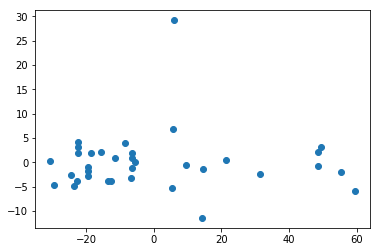

In [0]:
import matplotlib.pyplot as plt

plt.scatter(beer_pca_pandas.iloc[:,0],beer_pca_pandas.iloc[:,1])

In [0]:
from sklearn.cluster import KMeans

beer_pred = KMeans(n_clusters=3).fit_predict(beer_pca_pandas)
beer_pca_pandas["K-means"] = beer_pred
beer_pca_pandas.head()

,第一主成分,第二主成分,K-means
0,-24.577187,-2.663920,0
1,-22.594019,-3.783367,0
2,-18.520460,2.003459,0
3,-8.492478,3.950143,0
4,-5.539233,0.084667,0


/Users/kengotobita/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


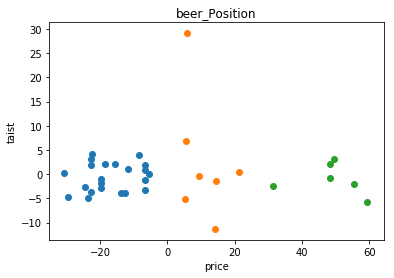

In [0]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for i in set(beer_pca_pandas.iloc[:,2]):
    df_kmean = beer_pca_pandas[beer_pca_pandas['K-means'] == i]
    ax.scatter(data=df_kmean, x="第一主成分", y = "第二主成分",label='K-means')
    
ax.set_title("beer_Position")
ax.set_xlabel("price")
ax.set_ylabel("taist")

fig.show()

In [0]:
beer_kmean0 = kmean0[kmean0["K-means"] == 0]
beer_kmean0.iloc[:,5:9].describe()

,alcohol,calorie,suger,prin
count,34.000000,34.000000,34.000000,34.000000
mean,0.053529,40.176471,1.932353,3.975000
std,0.012218,10.489448,1.525087,3.122262
min,0.030000,19.000000,0.000000,0.000000
25%,0.050000,33.250000,0.000000,1.750000
50%,0.050000,42.000000,2.350000,3.350000
75%,0.060000,45.750000,3.200000,5.850000
max,0.090000,63.000000,4.200000,11.000000


In [0]:
beer_kmean1 = kmean1[kmean1["K-means"] == 1]
beer_kmean1.iloc[:,[0,5,6,7,8,]].describe()

,asahi,alcohol,calorie,suger,prin
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.285714,0.054571,45.142857,3.205714,8.294286
std,0.458349,0.007005,6.141196,0.850240,2.012014
min,0.000000,0.045000,34.000000,1.000000,3.500000
25%,0.000000,0.050000,42.000000,2.900000,6.750000
50%,0.000000,0.055000,45.000000,3.100000,8.500000
75%,1.000000,0.055000,47.000000,3.500000,9.850000
max,1.000000,0.080000,74.000000,6.500000,11.400000


In [0]:
beer_kmean1 = kmean1[kmean1["K-means"] == 1]
beer_kmean1.iloc[:,5:9].describe()